In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pylab # this allows you to control figure size

In [2]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

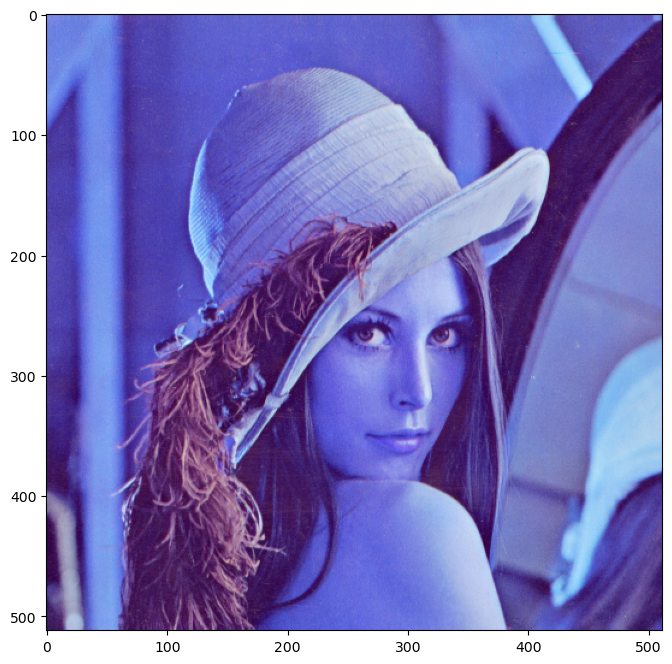

In [3]:
src = cv.imread("archives/test.png")
plt.imshow(src)

In [4]:
src.shape
src.size
src.dtype

dtype('uint8')

Text(0.5, 1.0, 'B')

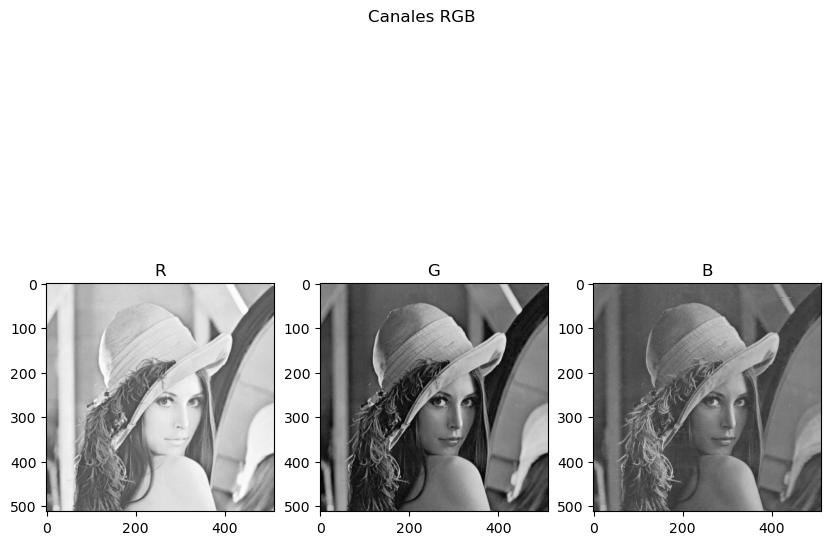

In [5]:
b, g, r = cv.split(src)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Canales RGB")
ax1.imshow(r, cmap="gray", vmin=0, vmax=255)
ax1.set_title("R")
ax2.imshow(g, cmap="gray", vmin=0, vmax=255)
ax2.set_title("G")
ax3.imshow(b, cmap="gray", vmin=0, vmax=255)
ax3.set_title("B")

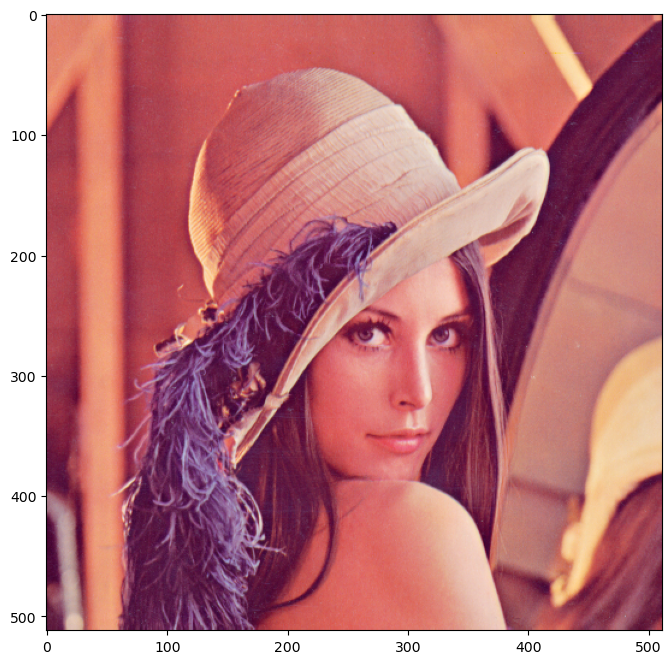

In [6]:
merged = cv.merge([r,g,b])
plt.imshow(merged)

H min: 0  H max: 179  H media: 92.25908279418945
S min: 5  S max: 246  S media: 133.30436325073242
V min: 59  V max: 255  V media: 180.43065643310547


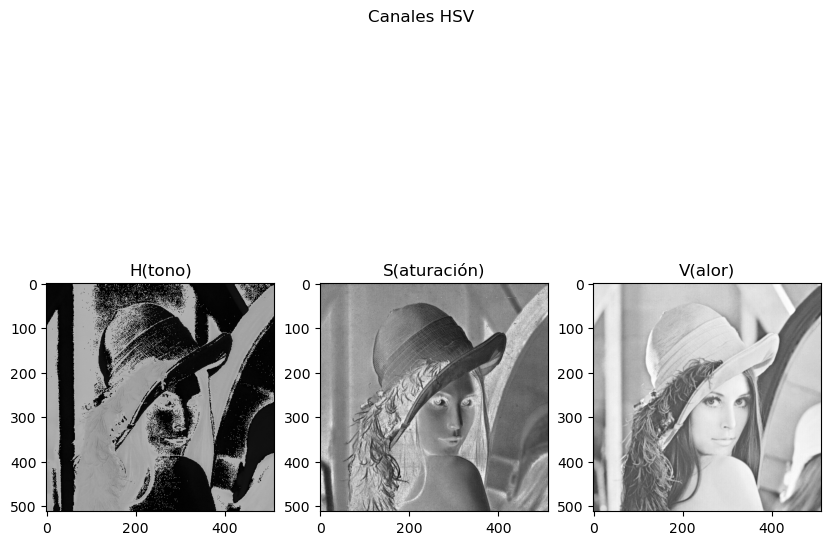

In [7]:
hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)
#h,s,v = cv.split(src)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Canales HSV")
ax1.imshow(h, cmap="gray", vmin=0, vmax=255)
ax1.set_title("H(tono)")
ax2.imshow(s, cmap="gray", vmin=0, vmax=255)
ax2.set_title("S(aturación)")
ax3.imshow(v, cmap="gray", vmin=0, vmax=255)
ax3.set_title("V(alor)")
print(f"H min: {h.min()}  H max: {h.max()}  H media: {h.mean()}")
print(f"S min: {s.min()}  S max: {s.max()}  S media: {s.mean()}")
print(f"V min: {v.min()}  V max: {v.max()}  V media: {v.mean()}")

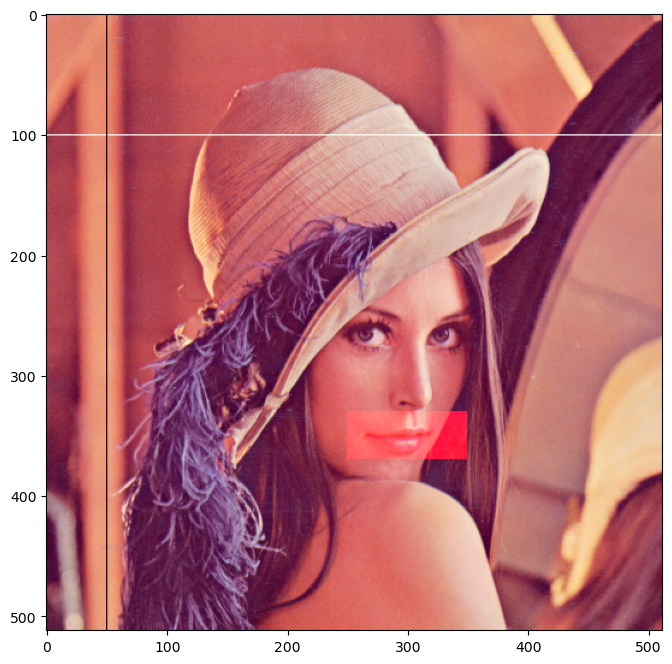

In [8]:
src = cv.imread("archives/test.png")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)

#linea blanca a la altura de 100
# for i in range(src.shape[1]):
#     src[100, i] = [255, 255, 255]
# src[y(filas), x(columnas), alpha???]
src[100, :, :] = [255, 255, 255]
src[:, 50, :] = [0, 0, 0]

# zona resaltada en rojo
src[330:370, 250:350, 0] = np.full((40, 100), 255, dtype=np.uint8)

plt.imshow(src)

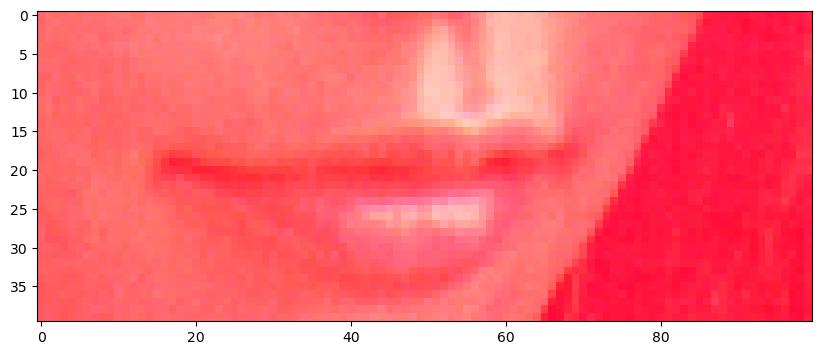

In [9]:
boca = src[330:370, 250:350]
plt.imshow(boca)

min: 25.0 en (508, 71) max: 245.0 in (116, 273)
Media: [[124.0485611]] DesStd: [[47.85559963]]


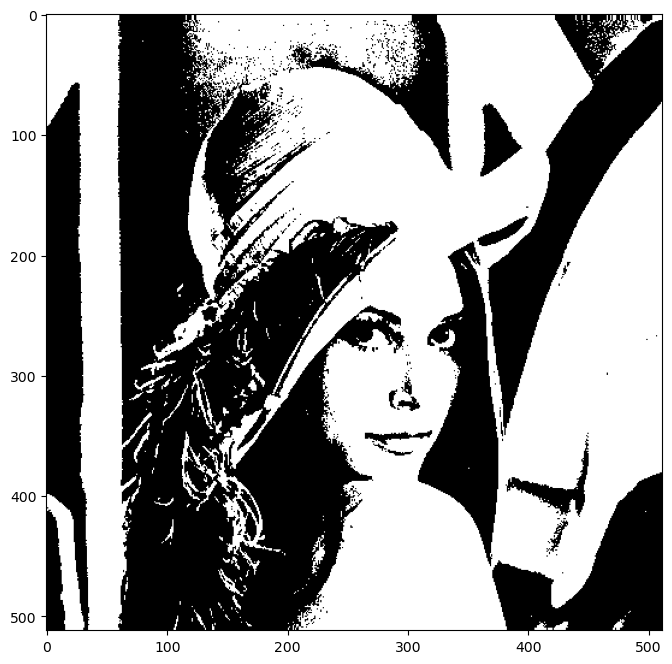

In [10]:
src = cv.imread("archives/test.png")
src = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

min, max, minloc, maxloc = cv.minMaxLoc(src)
print(f"min: {min} en {minloc} max: {max} in {maxloc}")

means, stddev = cv.meanStdDev(src)
print((f"Media: {means} DesStd: {stddev}"))

#bianrizando
src[np.where(src < means)] = 0
src[np.where(src >= means)] = 255

plt.imshow(src, cmap="gray")

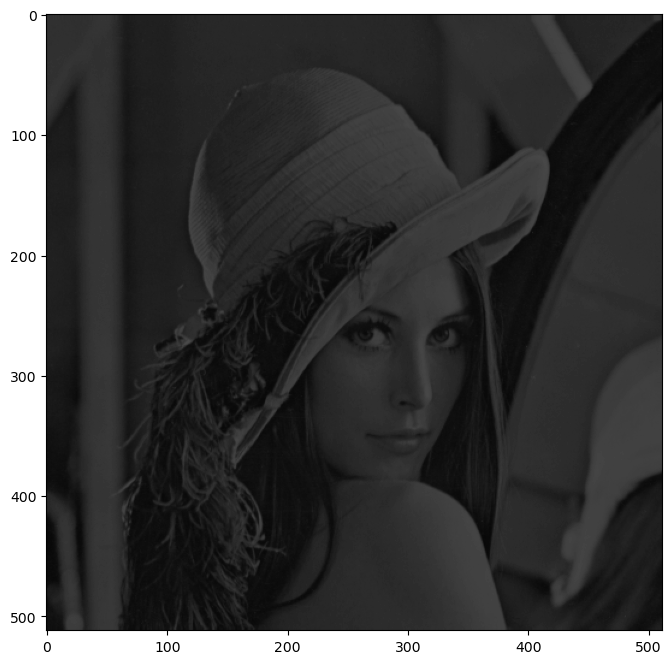

In [11]:
src = cv.imread("archives/test.png")
src = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

gris = np.float32(src)
destino = np.zeros(gris.shape, dtype=np.float32)
# ret = cv.normalize(gris, dst=destino, alpha=1, beta=0, norm_type=cv.NORM_MINMAX)
# ret = cv.normalize(gris, dst=destino, alpha=1, beta=100, norm_type = cv.NORM_INF)
ret = cv.normalize(gris, dst=destino, alpha=1, beta=100, norm_type = cv.NORM_L1)

# plt.imshow(destino, cmap="gray", vmin=0 ,vmax=255)
# plt.imshow(destino*255, cmap="gray", vmin=0 ,vmax=255)
plt.imshow(destino*10000000, cmap="gray", vmin=0 ,vmax=255)